# Datenquelle

Unter [https://www.openml.org/d/41214](https://www.openml.org/d/41214) und [https://www.openml.org/d/41215](https://www.openml.org/d/41215) finden Sie zwei Datensätze eines französischen Automobilversicherers. 

Diese beinhalten Risikomerkmale und Schadeninformationen zu Kraftfahrt-Haftpflicht-Versicherungsverträgen (eine Datensatzbeschreibung finden Sie am Ende dieses Textes). 

# Aufgabe

Ihre Aufgabe besteht in der Modellierung der zu erwartenden Schadenhöhe pro Versicherungsnehmer und Jahr anhand der Risikomerkmale der Kunden. Dieser Wert ist Basis für die Berechnung eines fairen Versicherungsbeitrags.

Die Ergebnisse ihrer Auswertungen stellen Sie im Rahmen des 60-minütigen technischen Interviews vor. Dabei haben Sie zunächst 15 Minuten Zeit, um die aus ihrer Sicht wesentlichen Ergebnisse vorzustellen. 

Die Form der Präsentation (frei, Folien, Jupyter-Notebook, R-Markdown...) wählen Sie dabei selbst. Anschließend findet eine Diskussion statt, in deren Rahmen Ihnen Fragen zu ihrer Vorgehensweise sowie zu Ihrem Programmcode gestellt werden. Es sollte anhand ihrer Arbeit gut nachvollziehbar sein, wie sie vorgegangen sind (beispielsweise anhand eines Jupyter-Notebooks oder R-Markdowns).


# Arbeitsschritte

Gehen Sie dabei in folgenden Teilschritten vor:

**1 Explorative Datenanalyse:**  
Machen Sie sich mit dem Datensatz vertraut. Identifizieren Sie dabei mögliche Probleme sowie grundlegende statistische Zusammenhänge, welche für die anschließende Modellierung wichtig sein könnten.

**2 Feature Engineering:**  
Bereiten Sie, soweit für ihre Modellierung nötig, die Variablen geeignet auf.

**3 Modellvergleich:**  
Entscheiden Sie sich für ein geeignetes Modell anhand einer dafür geeigneten Metrik. Erläutern Sie wie Sie dabei vorgehen und begründen Sie ihre Entscheidung.

**4 Modellbuilding:**  
Trainieren Sie unter Berücksichtigung der vorangegangenen Schritte das von Ihnen gewählte Modell zur Vorhersage der erwarteten Schadenhöhe pro Kunde und Jahr. Ihr Ziel ist es, einen möglichst fairen Versicherungsbeitrag pro Jahr für einzelne Kunden anhand der Ihnen zu Verfügung stehenden Merkmale zu bestimmen. Wählen Sie mindestens eine geeignete Metrik, um die Güte des finalen Modells zu beurteilen. Zeigen Sie, welche Variablen und Zusammenhänge für Ihr finales Modell relevant sind. Überlegen Sie sich (ohne dies umzusetzen) wie Sie Ihr Modell weiter optimieren könnten.


Diese Coding Challenge ist in etwa **5 Zeitstunden** gut zu erledigen. Wir erwarten nicht, dass Sie mehr Zeit investieren. Bitte teilen Sie sich ihre Zeit entsprechend ein und konzentrieren Sie sich auf das – aus ihrer Sicht - Wesentliche. Eine erschöpfende Tiefenanalyse der Daten und oder eine aufwändige Optimierung vieler verschiedener Modelle werden dementsprechend nicht von Ihnen erwartet.


# Datensatzbeschreibung

freMTPL2freq:

    • IDpol: ID des Vertrags
    • ClaimNb: Anzahl Schäden im Versicherungszeitraum
    • Exposure: Länge des Versicherungszeitraums (in Jahren) [Komponente der abhängigen
    Variable]
    • Area: Area-Code des Versicherungsnehmers [unabhängige Variable]
    • VehPower: Leistung des versicherten Kfz [unabhängige Variable]
    • VehAge: Alter des versicherten Kfz [unabhängige Variable]
    • DrivAge: Alter des Versicherungsnehmers [unabhängige Variable]
    • BonusMalus: Schadenfreiheitsrabatt (französische Entsprechung der Schadenfreiheitsklasse) [unabhängige Variable]
    • VehBrand: Marke des versicherten Kfz [unabhängige Variable]
    • VehGas: Antrieb des versicherten Kfz [unabhängige Variable]
    • Density: Anzahl der Einwohner pro km2 im Wohnort des Versicherungsnehmers [unabhängige Variable]
    • Region: Region des Versicherungsnehmers [unabhängige Variable]


freMTPL2sev:

    • IDpol: ID des Vertrags
    • ClaimAmount: Höhe der einzelnen Schadenaufwände (mehrere Einträge pro Vertrag, falls im
    Zeitraum mehrere Schäden vorhanden waren.) [Komponente der abhängigen Variable.
    
    Die abhängige Variable ist definiert als ClaimAmount / Exposure.


**Hinweis: Der Datensatz steht öffentlich nur im .arff Format zur Verfügung. Mit Hilfe folgender Code-Zeile können Sie die Daten in Python einlesen und zu einem Pandas Dataframe konvertieren:**

    import pandas as pd
    import arff
    data_freq = arff.load('freMTPL2freq.arff')
    df_freq = pd.DataFrame(data_freq, columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower",
    "VehAge","DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"])
    data_sev = arff.load('freMTPL2sev.arff')
    df_sev = pd.DataFrame(data_sev, columns=["IDpol", "ClaimAmount"])

# Importiere libraries

In [152]:
import pandas as pd
import numpy as np
import arff

import missingno as msno
from ydata_profiling import ProfileReport

# Importiere Daten

In [153]:
data_freq = arff.load('data/freMTPL2freq.arff')
df_freq = pd.DataFrame(data_freq, columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower",
"VehAge","DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"])
data_sev = arff.load('data/freMTPL2sev.arff')
df_sev = pd.DataFrame(data_sev, columns=["IDpol", "ClaimAmount"])

**Erster Blick auf die Daten df_freq**

In [154]:
df_freq.head(5)

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1.0,0.10,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
1,3.0,1.0,0.77,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
2,5.0,1.0,0.75,'B',6.0,2.0,52.0,50.0,'B12',Diesel,54.0,'R22'
3,10.0,1.0,0.09,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'
4,11.0,1.0,0.84,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'


In [155]:
df_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  float64
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  float64
 5   VehAge      678013 non-null  float64
 6   DrivAge     678013 non-null  float64
 7   BonusMalus  678013 non-null  float64
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  float64
 11  Region      678013 non-null  object 
dtypes: float64(8), object(4)
memory usage: 62.1+ MB


**Erster Blick auf die Daten df_sev**

In [156]:
df_sev.head(5)

,IDpol,ClaimAmount
0,1552.0,995.20
1,1010996.0,1128.12
2,4024277.0,1851.11
3,4007252.0,1204.00
4,4046424.0,1204.00


In [157]:
df_sev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26639 entries, 0 to 26638
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        26639 non-null  float64
 1   ClaimAmount  26639 non-null  float64
dtypes: float64(2)
memory usage: 416.4 KB


**Kritische Beobachtung**  
Die Anzahl der Identifier-Datensätze ist unterschiedlich.


In [158]:
df_freq['IDpol'].nunique()

678013

In [159]:
df_sev["IDpol"].nunique()

24950

in df_freq scheint die IDpol eineindeutig zu sein. 
in df_sev scheinen einige IDpol nicht eineindeutig zu sein.

# Exploring the Data

## Checking for missing values

<Axes: >

<Axes: >

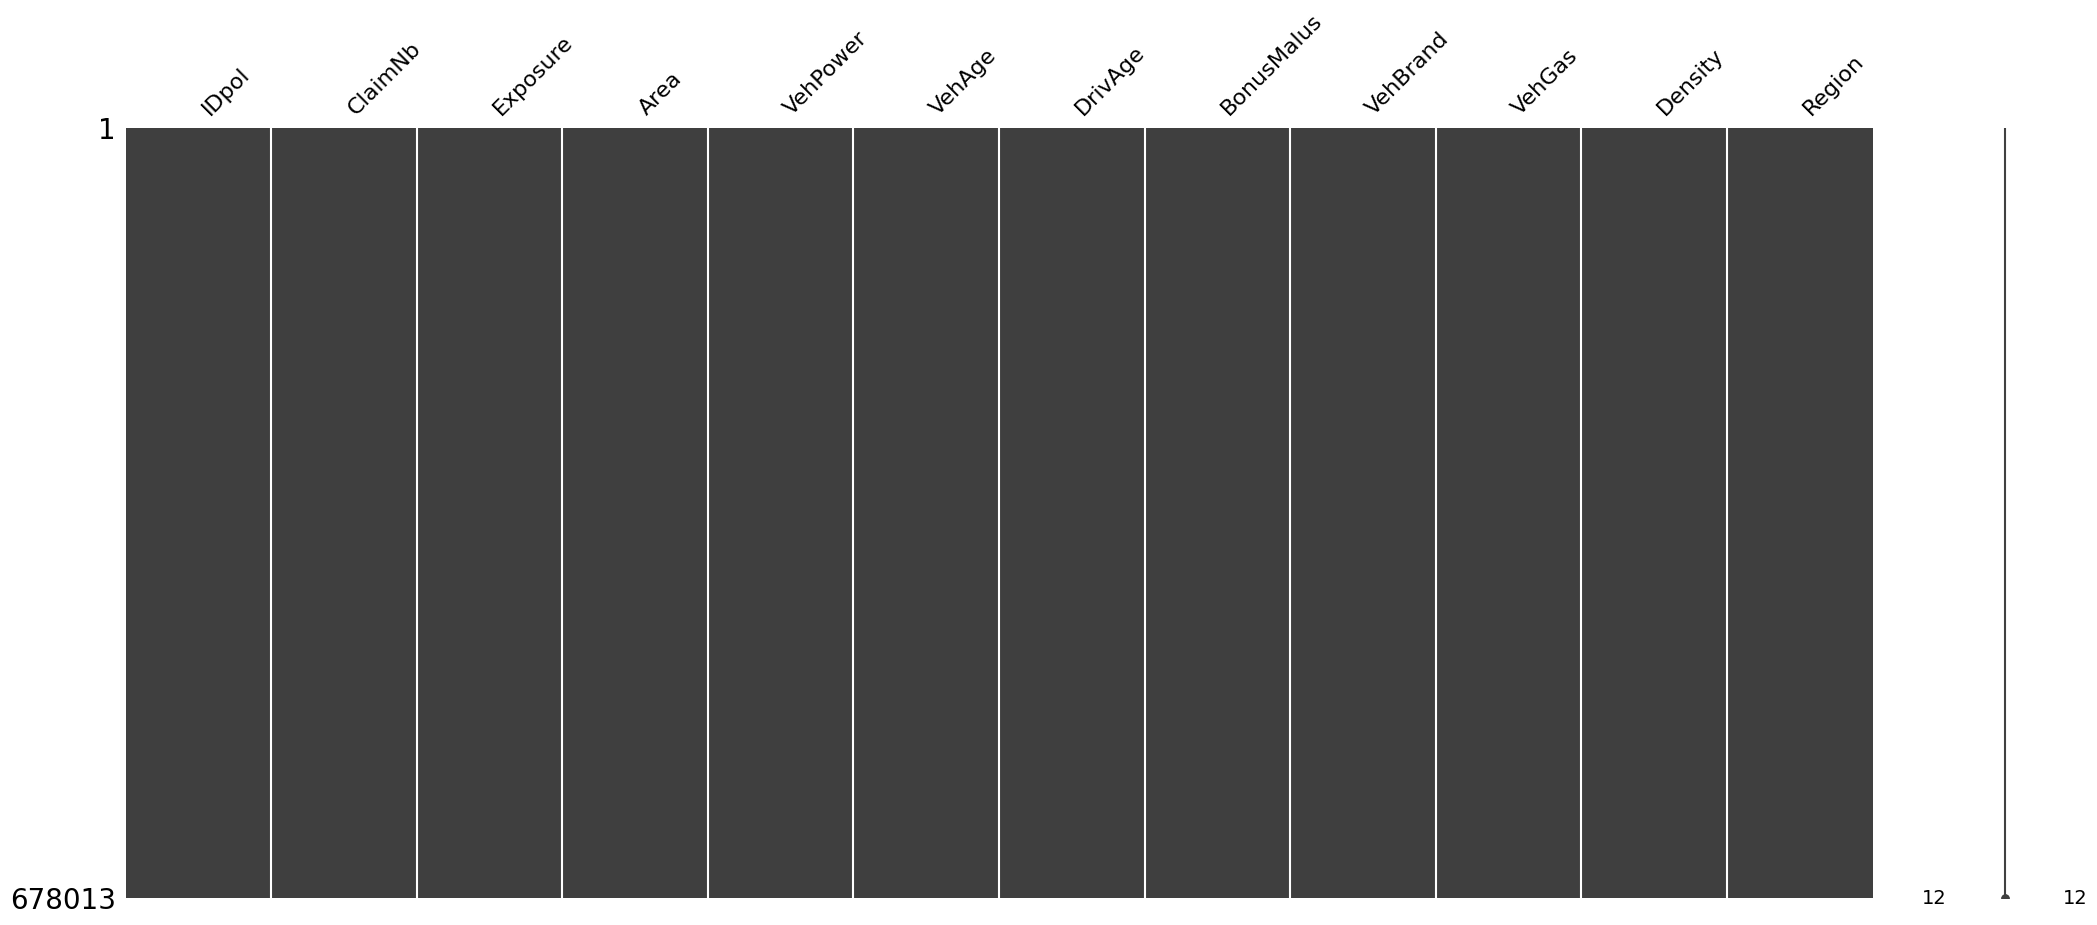

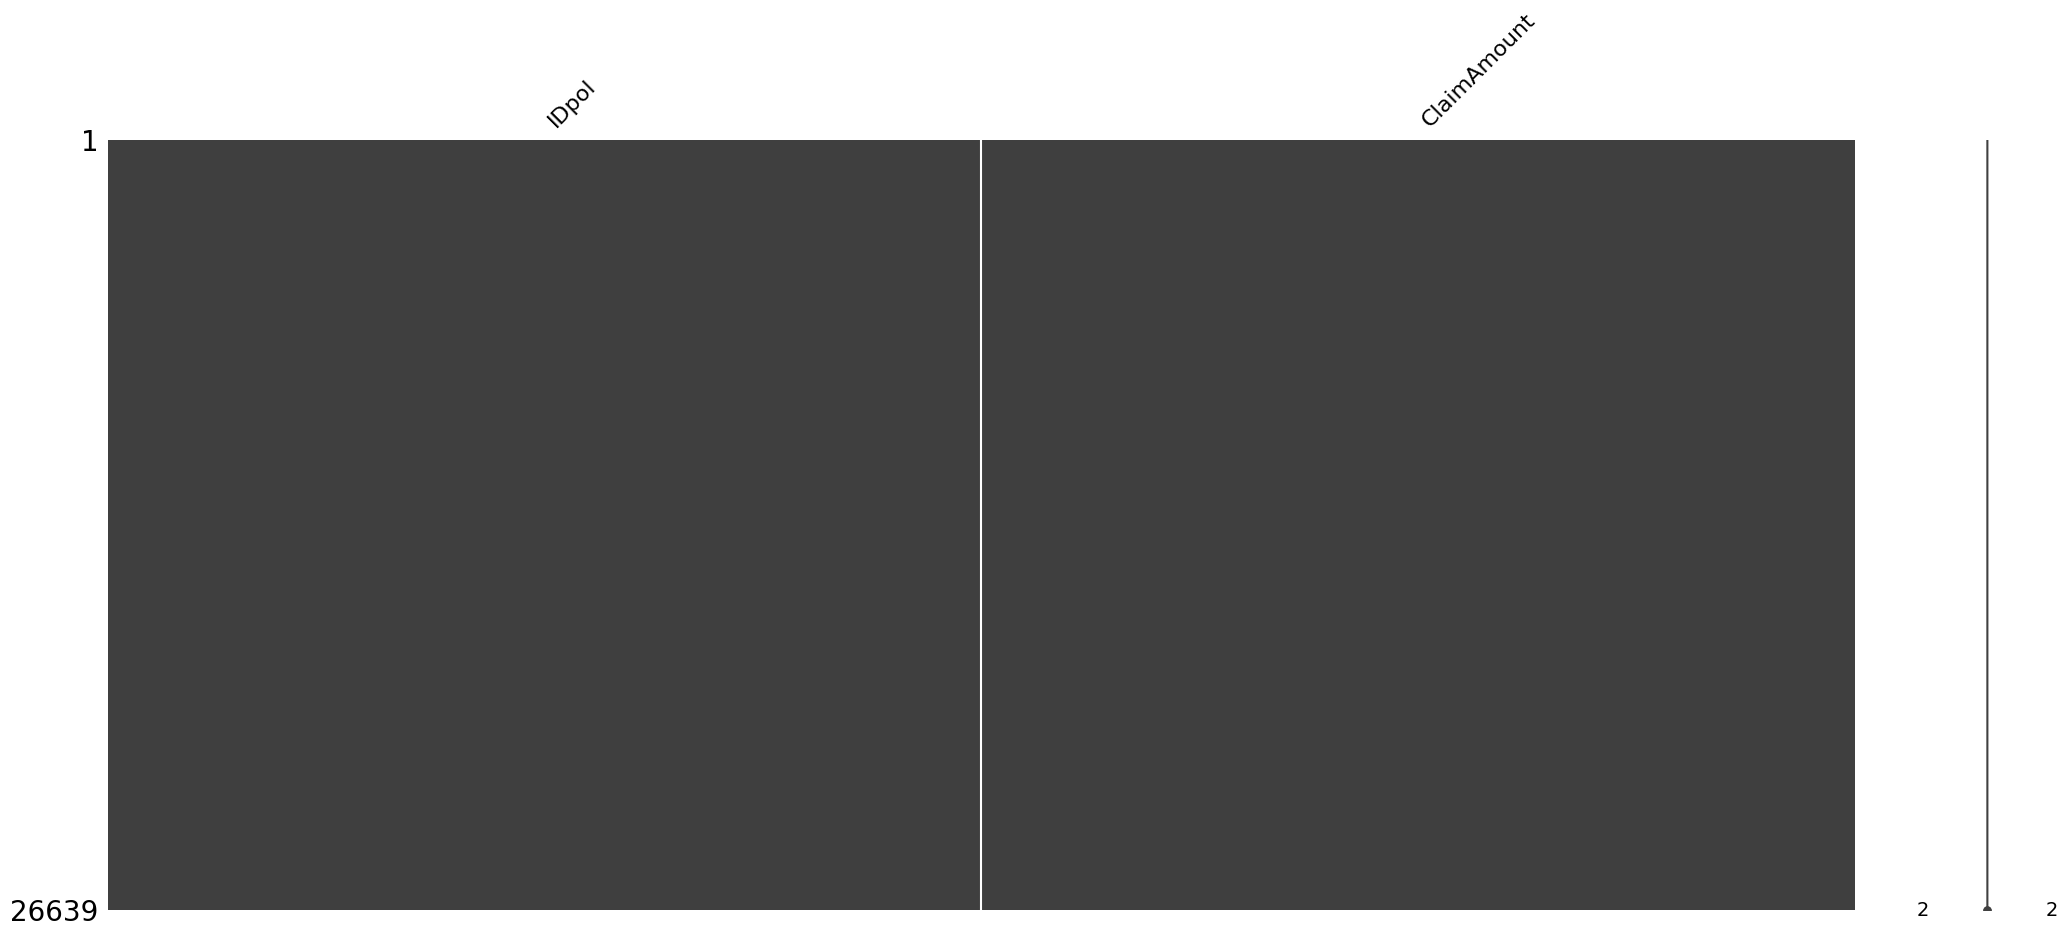

In [160]:
display(msno.matrix(df_freq), msno.matrix(df_sev))

**Es scheint so, als gäbe es in den einzelnen Datensätze keine Missing Values**

## ydata profiling

In [161]:
profile_sev = ProfileReport(df_sev, title="Profiling Report df_sev")
profile_freq = ProfileReport(df_freq, title="Profiling Report df_freq")

In [162]:
profile_sev.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

**Kritische Beobachtungen zu df_sev**
- Dataset has 241 (0.9%) duplicate rows
- ClaimAmount is highly skewed (γ1 = 109.5644925)
- ClaimAmount has minimum values that do not seem plausible

In [163]:
profile_freq.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

**Kritische Beobachtungen**
- DrivAge is highly overall correlated with BonusMalus 
- BonusMalus is highly overall correlated with DrivAge --> Multikollinearität
- Density is highly overall correlated with Area
- Area is highly overall correlated with Density --> Multikollinearität
- IDpol has unique values
- ClaimNb has 643953 (95.0%) zeros --> 95% aller Policen haben im Betrachungsjahr keinen Schaden gemeldet
- VehAge has 57739 (8.5%) zeros --> Neuwagen?

**Notiz zur ersten Vermutung**  
aus df_freq abgeleitet:  
Wir haben laut Daten 678013 Versicherungspolicen vorliegen, von denen 5% (also 34060) einen Schaden gemeldet haben. 


aus df_sev abgeleitet:  
24950 Policen haben Versicherungsschutz abgerufen und zwar in 26639 Schadensfällen.


==> daraus ergibt sich eine Unklarheit. Es wurden in df_freq 34060 Policen mit Schäden gemeldet, es gibt aber nur 24950 Policen mit bewerteten Schäden (Schadensaufwände) in df_sev. Diese Diskrepanz beträgt 9110 Policen.

**Ideen**

- Es gibt Schäden, die aus verschiedenen Gründen gemeldet, aber nicht den Prozess bis zur Schadensbewertung durchlaufen.
- Was gilt als Schaden? Sind hier auch Schäden vermerkt, deren Schuld die Gegenseite übernommen hat? Womöglich gibt es deswegen keinen Schadensaufwand.
- Analyse der Missing Values nach MCAR (Missing completely at random), MAR (Missing at random), MNAR (Missing not at random).

**Duplikate**

df_sev scheint duplicates zu haben. Let us look at them.

In [ ]:
df_sev[df_sev.duplicated()]

,IDpol,ClaimAmount
162,4023587.0,1204.0
312,4055082.0,1204.0
315,4044981.0,1204.0
399,4041886.0,1204.0
409,4073123.0,1204.0
...,...,...
26503,3253234.0,1500.0
26504,3253234.0,1500.0
26634,3254353.0,1200.0
26635,3254353.0,1800.0


Können die Duplicates Sinn ergeben? 
- Es sollte geklärt werden, wie der Prozess bei der Schadensbewertung geschieht. Wenn derselben IDpol ein ClaimAmount in selber Höhe mehrmals zugeordnet ist, ist das dann eine Ratenzahlung? Ein anderer Schadensfall? Ein Problem der Datenqualität (Tippfehler, technischer Übertragungsfehler, oder gar eine nachträgliche Korrektur um die korrekte Schadensumme abzubilden)?

Da mir das genaue Wissen fehlt, geh ich nach Ockhams Rasiermesser zunächst davon aus, dass die Daten korrekt sind (KISS).

# Preparing the data

## Merging

Ich führe beide Dataframes in einen Dataframe zusammen.

In [165]:
df = df_freq.copy()

In [166]:
df = df.merge(df_sev, how="outer", on="IDpol")

In [167]:
df.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,1.0,1.0,0.10,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82',NaN
1,3.0,1.0,0.77,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82',NaN
2,5.0,1.0,0.75,'B',6.0,2.0,52.0,50.0,'B12',Diesel,54.0,'R22',NaN
3,10.0,1.0,0.09,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72',NaN
4,11.0,1.0,0.84,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72',NaN


## Feature Engineering

**Anpassung der Feature Names**  
Die column names sollen klein geschrieben sein.

In [168]:
df.columns = df.columns.str.lower()

### Datentypen

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679708 entries, 0 to 679707
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   idpol        679708 non-null  float64
 1   claimnb      679513 non-null  float64
 2   exposure     679513 non-null  float64
 3   area         679513 non-null  object 
 4   vehpower     679513 non-null  float64
 5   vehage       679513 non-null  float64
 6   drivage      679513 non-null  float64
 7   bonusmalus   679513 non-null  float64
 8   vehbrand     679513 non-null  object 
 9   vehgas       679513 non-null  object 
 10  density      679513 non-null  float64
 11  region       679513 non-null  object 
 12  claimamount  26639 non-null   float64
dtypes: float64(9), object(4)
memory usage: 67.4+ MB


In [170]:
for column in df.columns:
    dtype = pd.api.types.infer_dtype(df[column])

    # Überprüfe, ob dtype 'mixed' ist
    if dtype == 'mixed':
        print(f'Die Spalte {column} enthält gemischte Datentypen.')
    else:
        print(f'Die Spalte {column} enthält keine gemischten Datentypen.')

Die Spalte idpol enthält keine gemischten Datentypen.
Die Spalte claimnb enthält keine gemischten Datentypen.
Die Spalte exposure enthält keine gemischten Datentypen.
Die Spalte area enthält keine gemischten Datentypen.
Die Spalte vehpower enthält keine gemischten Datentypen.
Die Spalte vehage enthält keine gemischten Datentypen.
Die Spalte drivage enthält keine gemischten Datentypen.
Die Spalte bonusmalus enthält keine gemischten Datentypen.
Die Spalte vehbrand enthält keine gemischten Datentypen.
Die Spalte vehgas enthält keine gemischten Datentypen.
Die Spalte density enthält keine gemischten Datentypen.
Die Spalte region enthält keine gemischten Datentypen.
Die Spalte claimamount enthält keine gemischten Datentypen.


### Missing Values

In [171]:
display("NA: ",df.isna().sum())

'NA: '

idpol               0
claimnb           195
exposure          195
area              195
vehpower          195
vehage            195
drivage           195
bonusmalus        195
vehbrand          195
vehgas            195
density           195
region            195
claimamount    653069
dtype: int64

In [172]:
df.isnull().sum()

idpol               0
claimnb           195
exposure          195
area              195
vehpower          195
vehage            195
drivage           195
bonusmalus        195
vehbrand          195
vehgas            195
density           195
region            195
claimamount    653069
dtype: int64

<Axes: >

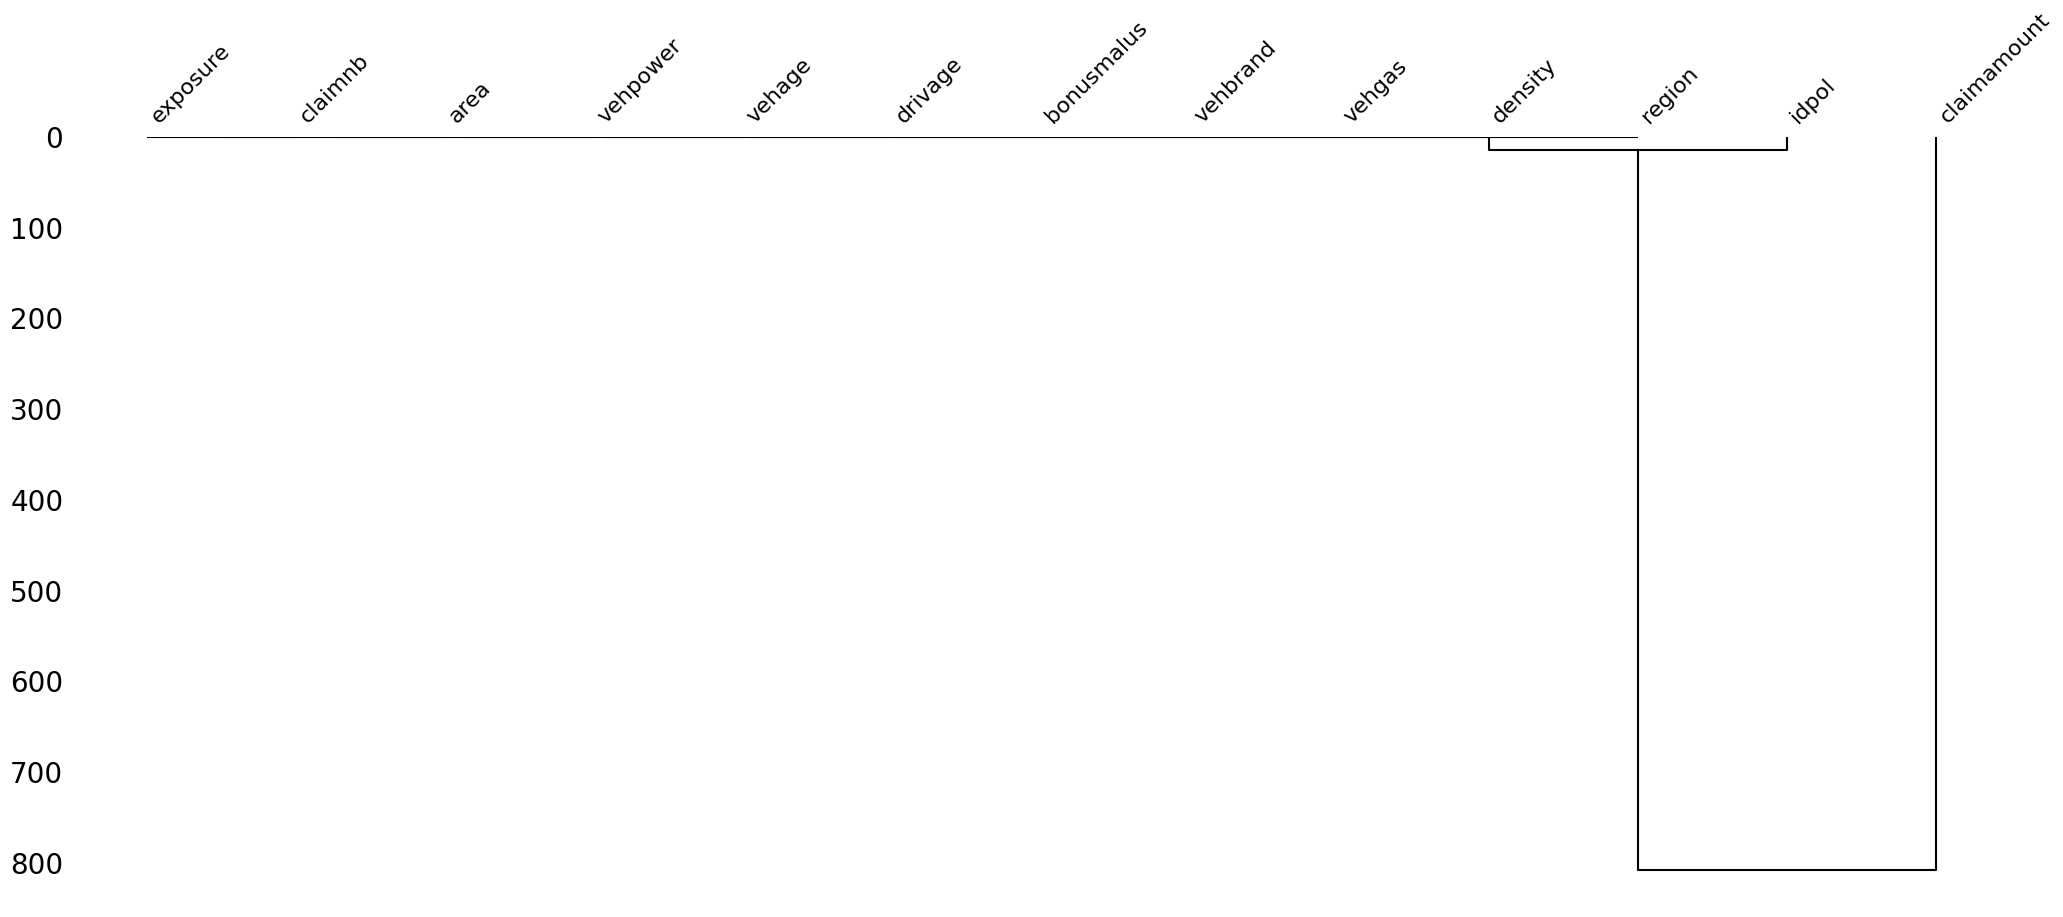

In [173]:
msno.dendrogram(df)